Status:  ✅  done

## 📓 Exercise 18

---

In this exercise, we will focus on understanding feed forward neural network (a.k.a. `FFNN`) on a theoretical level. Therefore, after this session, you should be able to explain:
- what is a neural network (namely what it makes it different from other algorithms that we have learnt about)
- how does `forward` and `backward` pass works

Without further ado, let's get to work!

> Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from scipy.special import expit, logit

### 🏷 FFNN: theory

---

In this section, we do a quick run through the theory, if you want more details, feel free to check my [notes](https://ludekcizinsky.notion.site/NN-and-CNN-8c739d9486c142f28df7acb6d99ccccc) on the `FFNN`.

> Formula for FFNN

Previously, we have always had a formula for given model. For instance, `linear regression`:

$
h(x) = X\theta + \theta_0
$

How about `FFNN`? Well, as many things in machine learning, it depends... More specifically, it depends on the architecture that you choose. In the neural nets lingo, its architecture can be broken down into three types of layers:
- `Input layer` = The number of neurons in the layer corresponds to the number of features. There is always only one input layer.
- `Hidden layer` = Number of hidden layers in the network is a design choice and so is the number of neurons in each corresponding layers.
- `Output layer` = The number of neurons depends on the problem we are trying to solve. If regression or binary classification, then only 1 neuron. If multi-class classification, then $K$ neurons where $K$ is the number of classes. There is always one output layer.

For instance, consider we have the following `FFNN`:

<img src="nn_example.jpg" alt="neural net example" style="width:80%;height:80%;margin-left:auto;margin-right: auto">

Then, formula for the output can be broken down into two steps. First, we need to get the output of the first layer $l_1$:

$
\begin{aligned}
l_1(x) = a_1(x\theta{_{1,w}} + \theta_{1,b})
\end{aligned}
$

Then we use $l_1$ as an input to compute the output layer $l_2$:

$
\begin{aligned}
l_2(l_1) = o_2(l_1\theta_{2,w} + \theta_{2,b})
\end{aligned}
$

Note that $a$ and $o$ stands for `activation` and `output` functions respectively. In addition, $\theta_{1, w}$ stands for the models' parameters between the input and first hidden layer as depicted in the image. It is a matrix of shape $2 \times 3$. Therefore, when we do $x\theta{_{1,w}}$ we obtain $1 \times 3$ row vector to which we then add bias vector $\theta_{1,b}$ and then we transform each element in this resulting vector by some activation function, this yields the values of neurons in the first layer. 

Of course, we can squash the above two formulas into a single one and make it look more nasty:

$
h(x) = o_2(a_1(x\theta{_{1,w}} + \theta_{1,b})\theta_{2,w} + \theta_{2,b})
$

I guess you get the point, the more complex architecture you choose, the more complex this formula will look like. Currently, we have $17$ parameters to train:
- $\theta{_{1,w}}$ is $2 \times 3$ matrix which is **6** parameters
- similarly $\theta{_{2,w}}$ is $3 \times 2$ matrix thus again **6** parameters
- then $\theta_{1,b}$ is $1 \times 3$ row vector with **3** parameters corresponding to each neuron in the first layer, in a similar fashion $\theta_{2,b}$ has **2** parameters

So far we have discussed how we can construct a formula for given neural net for a single input $x$. But in practice, we would like to compute the output of our `FFNN` for $n$ samples/inputs. In other words, while now according to our formula $h(x)$ outputs $1 \times 2$ row vector, we would like it to output $n \times 2$ matrix where each row corresponds to the output for the $i$-th input. As a matter of fact, we just need to change the input from row vector $x$ to a whole matrix $X$ :

$
h(X) = o_2(a_1(X\theta{_{1,w}} + \theta_{1,b})\theta_{2,w} + \theta_{2,b})
$

Actually, there is one little detail I skipped...  the bias vector in each layer $\theta_{i,b}$ is a matrix of the same dimension as the product between the given input matrix and parameter matrix $\theta_{i,w}$. A practical example based on our given network. When we do $X\theta{_{1,w}}$, we obtain $n \times 3$ matrix, therefore the $\theta_{1,b}$ will also be $n \times 3$ matrix. Now, does it change the number of parameters we have in our model? Absolutely not! Each row in this bias matrix are the same bias parameters. If this feels bit confusing, focus on being able to explain how the `FFNN` works for a single input, then try to advance to the $n$ inputs (a.k.a. `vectorized` form) We will also practice this below.

> Activation functions

Activation functions are the bread and butter of the neural nets. Let's now focus on the them and their properties:

**Sigmoid function**

$
\sigma(x) = \frac{1}{1 + e^{-x}}
$

Properties:
- Towards either end of sigmoid, the outputs tend to represent smaller changes (even when we have big changes in $x$) As a result, we might encounter during training a problem called `vanishing gradient`. Vanishing gradient means that value of gradient vanished or is very small. As a result, training of the network is slow or even stops
- Computationally expensive (exponential in the formula)

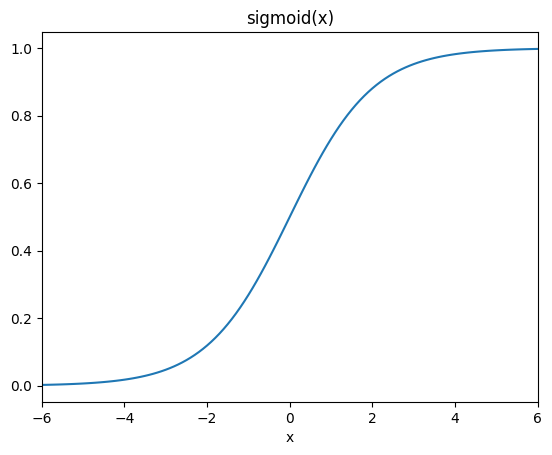

In [2]:
# Define plot
fig, ax = plt.subplots()
sns.set_style("whitegrid")

# Define data to plot
x = np.linspace(-6, 6, 121)
y = expit(x)

# Plot the data
sns.lineplot(x=x, y=y, ax=ax)
ax.set_xlim(-6, 6);
ax.set_xlabel('x');
ax.set_title('sigmoid(x)');

**Relu function**

$
f(x) = max(0, x)
$

Properties:
- Non-linear
- When $x > 0$ derivative is one and $x < 0$ derivative is zero.
- Computationally efficient
- The Dying ReLU problem: For negative input, the gradient is zero —> network stops learning. In addition, you might end up with dead neurons if the linear combination is less than 0
- However, often enough activations will have a positive value

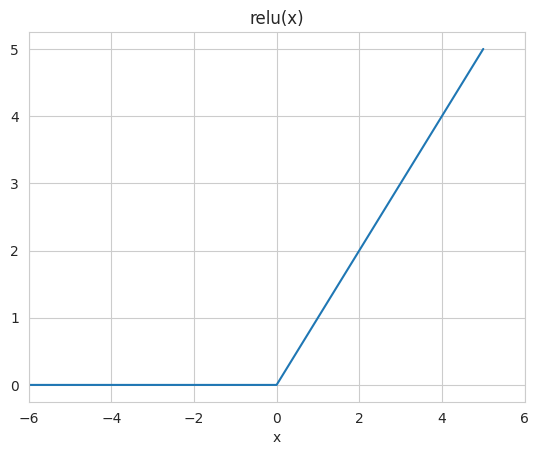

In [3]:
# Define plot
fig, ax = plt.subplots()
sns.set_style("whitegrid")

# Define data to plot
x = np.arange(-6, 6)
relu = np.vectorize(lambda x: max(0, x))
y = relu(x)

# Plot the data
sns.lineplot(x=x, y=y, ax=ax)
ax.set_xlim(-6, 6);
ax.set_xlabel('x');
ax.set_title('relu(x)');

**More activation functions**
For more activation functions and their properties, check out my [note](https://www.notion.so/ludekcizinsky/Miscellaneous-d1a16e8fa58440f3981ade10740f1035#aacc18415056409a9e79b96513729b47).

**Activation functions and role of the bias term**

Speaking of activation functions, we can discuss the role of bias term in terms of influencing the value of the given neuron. Generally speaking, bias term is the only term which is independent of the input features. This means that it gives the model additional freedom. For instance, if the linear combination of the features and model's parameters end up being a very high positive number, then according to the sigmoid, this would yield number close to 1. However, based on the loss function, the model would figure that this is suboptimal. Then it can either adjust the parameters in the linear combination such that they yield smaller number, or it can add a big negative bias term which would similarly drag the high positive output of the linear combination down. It could for instance even turn it into a very low negative number which according to the sigmoid would mean that the value of given neuron is close to zero.

> Exploring FFNN with Tensorflow playground

To get a better sense of `FFNN`, you can use the [TensorFlow Playground](https://playground.tensorflow.org). Try to explore the following:
- `The patterns learned by a neural net`. Try training the default neural network by clicking the Run button (top left). Notice how it quickly finds a good solution for the classification task. The neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers there are, the more complex the patterns can quickly be.

- `Activation functions`. Try replacing the tanh activation function with a ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function. The risk of local minima. Modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the network weights, click the Reset button next to the Play button). Notice that the training time varies a lot, and sometimes it even gets stuck in a local minimum.

- `What happens when neural nets are too small`. Remove one neuron to keep just two. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and systematically underfits the training set.

- `What happens when neural nets are large enough`. Set the number of neurons to eight, and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck in local minima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

> Section summary

After going through this section, you should be able to:
- explain the concept of `FFNN`
- given a simple architecture, translate it into model's function
- name a couple of activation functions and discuss their properties (in relation to their plot)

### 🏷 FFNN: small practical examples

---

In this section, we will focus on small practical examples that should allow you to better understand how **forward** and **backward** pass works.

> Simple forward and backward pass example

Consider the following neuron, where $z$ is the sum of all the inputs to the neuron and $a$ is the output of the activation function:
<img
src="https://cdn.mathpix.com/snip/images/Nw51wC62kOO9K0KC0Rsot7asEtAY05gr1xebvUBGiwo.original.fullsize.png" alt="neural net example" style="width:25%;height:25%;margin-left:auto;margin-right: auto">

Further, we know that:
- weight values are: $w_1=1, w_2=2, w_3=0.5, w_4=1.5, b=-0.2$
- loss function is $L(y, a)=\frac{1}{2}(y-a)^2$
- activation function is `linear`: $f(x) = x$ (for simplicity)

Let's start with computing the **forward pass** for the input $x=[0,0.1,2,1]$ and $y = 3$:

In [4]:
# Define input
x = np.array([0, 0.1, 2, 1, 1])
y = 3

# Define model's parameters
w = np.array([1, 2, .5, 1.5, -0.2])

# Define the model and loss functions
model1 = lambda x, w: np.dot(x, w)
lossf = lambda y, yhat: (1/2)*(y - yhat)**2

# Compute the prediction and loss
yhat = model1(x, w)
loss = lossf(y, yhat)
print(f"Output of the model after the first forward pass is {yhat} and loss is {loss}")

Output of the model after the first forward pass is 2.5 and loss is 0.125


Now, let's do the **backward pass**. For that we need to first compute the gradient vector of our loss function $\nabla L$. Our loss function is defined as follows:

$
L_w(y, x) = \frac{1}{2}(y - (w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + b))^2
$

To find the gradient vector of our loss function $L$, we need to find the partial derivative with respect to each of the parameters $w_i$ and also $b$. For instance:

$
\frac{\partial L}{\partial w_1} = -x_1(y - (w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + b))
$

In a similar fashion, we would do this for all other $w_i$. Now, for $b$:

$
\frac{\partial L}{\partial b} = -1(y - (w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + b))
$

To finalise the backward pass/step, we will assume the following learning rate $\alpha = .01$:

In [5]:
# Setup hyper-parameter
a = .01

# Setup gradient vector
tmp = 3 - model1(x, w) # computes y - (w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + b)
gdv = np.array([0, -.1, -2, -1, -1])*tmp

# Do the backward pass
wnew = w - a*gdv
wnew

array([ 1.    ,  2.0005,  0.51  ,  1.505 , -0.195 ])

Finally, we can try again do the forward pass with the new parameters:

In [6]:
# Compute the prediction and loss
yhat = model1(x, wnew)
loss = lossf(y, yhat)
print(f"Output of the model after the second forward pass is {yhat} and loss is {loss}")

Output of the model after the second forward pass is 2.53005 and loss is 0.11042650124999993


We can see that our loss decreased!

> A bit more complex FFNN example

In this section, we will work with a bit more advanced `FFNN`:



<img
src="https://cdn.mathpix.com/snip/images/6vyJjT4UygE5DzzEnlG98VJBl_5r3HMPcCB09SsilVc.original.fullsize.png" alt="neural net example" style="width:40%;height:25%;margin-left:auto;margin-right: auto">

We will only focus on the **forward pass** this time as backward pass would require to do a bit more calculations which is out of scope of this exercise, but stay tuned for till the next one, where we will do backpropagation in mode depth. Back to the implemntation of the forward pass for this particular network:

In [7]:
class Model2:

    def __init__(self):

        # Input to hidden layer
        self.w1 = np.array([[1, 1.5, -2], [.5, 2, .7]])
        self.b1 = np.array([.5, -1, .5])
        self.a1 = relu

        # Hidden to output layer
        self.w2 = np.array([[-.7, 0.1, 0.2]]).T
        self.b2 = np.array([1])
        self.o2 = expit

    def predict_proba(self, x):
        l1 = self.a1(x @ self.w1 + self.b1)
        pclass1 = self.o2(l1 @ self.w2 + self.b2)
        pclass0 = np.ones((x.shape[0], 1)) - pclass1
        
        prob = np.concatenate([pclass0, pclass1], axis=1)
        return prob

    def d(self, p):
        return 1 if p > 0.5 else 0

    def predict(self, x):
        return np.argmax(self.predict_proba(x), axis=1)

Let's test it on a simple input:

In [8]:
# Define input
x = np.array([[1, 2], [3, 4]])

# Run the model against input
model2 = Model2()
yhat = model2.predict_proba(x)
print("Model's predictions: {:.3f}, {:.3f}".format(yhat[0, 0], yhat[1, 0]))

Model's predictions: 0.574, 0.846


Finally, let's try our model on a **grid** of values and visuliaze our models' decision regions with corresponding confidence:

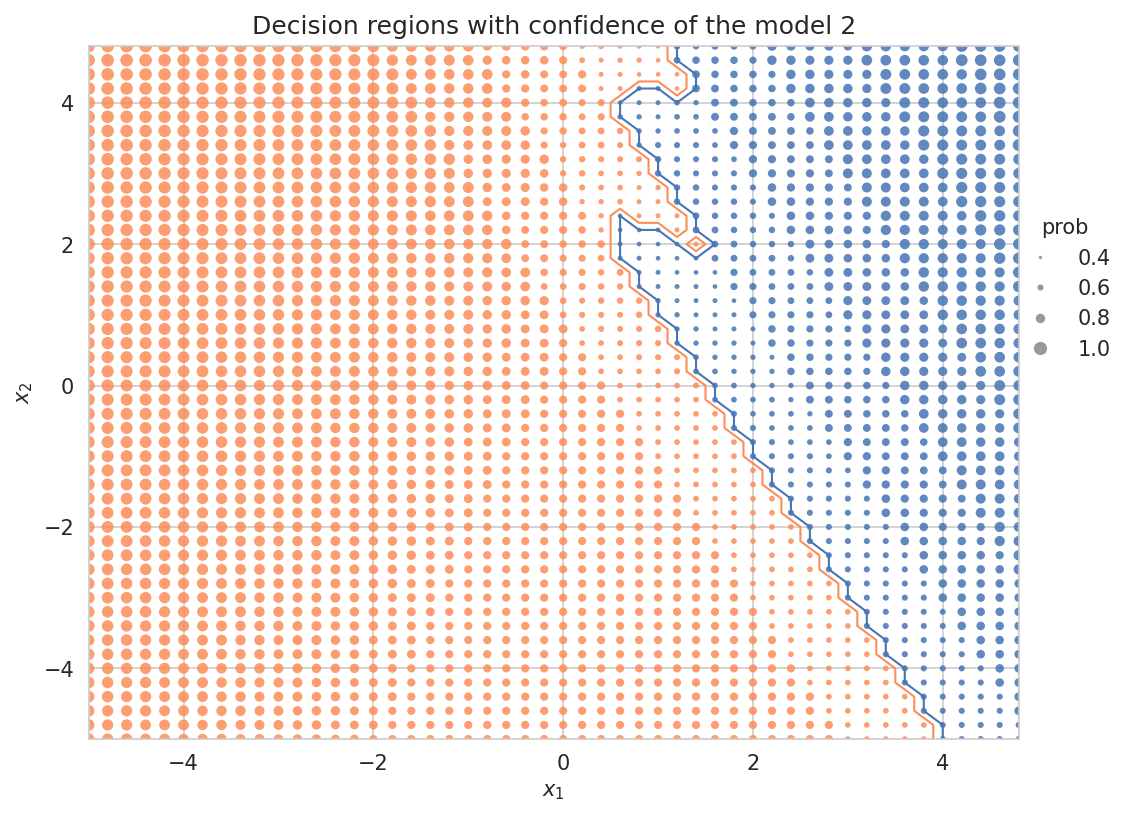

In [9]:
# --- Define plot and its properties
# - Figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), dpi=150)

# - Style and colors
sns.set_style("white")
orangeish = '#fc8d59'
blueish = '#4575b4'
colormap = np.array([blueish,orangeish])

# - Dots in the figure hyper-parameters
PROB_DOT_SCALE = 40 # modifier to scale the probability dots
PROB_DOT_SCALE_POWER = 3 # exponential used to increase/decrease size of prob dots

# --- Define meshgrid
h = 0.2
x_min, x_max = -5, 5
y_min, y_max = -5, 5
x_range, y_range = np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)
xx0, xx1 = np.meshgrid(x_range, y_range)
xx = np.reshape(np.stack((xx0.ravel(),xx1.ravel()),axis=1),(-1,2))

# --- Define third and fourth dimensions: color and size of the dots
# - color of the dots based on the class
yy_hat = model2.predict(xx) 

# - size of the dot based on the probability
yy_prob = model2.predict_proba(xx)
yy_size = np.max(yy_prob, axis=1)

# --- Plotting
# - plot the dots
dotsize = PROB_DOT_SCALE*yy_size**PROB_DOT_SCALE_POWER
ax.scatter(xx[:,0], xx[:,1], c=colormap[yy_hat], alpha=0.85, s=dotsize, linewidths=0);

# - plot contour lines
zz = np.reshape(yy_hat,(xx0.shape[0],-1))
ax.contour(x_range, y_range, zz, 
           levels=1, linewidths=1,
           colors=[blueish,orangeish]);

# --- Labelling
# - prob legend
prob_values = [0.4, 0.6, 0.8, 1.0]
legend_prob = []
for prob in prob_values:
    legend_prob.append(Line2D([0], [0], marker='o', label=prob, ls='None', alpha=0.8,
                              markerfacecolor='grey', 
                              markersize=np.sqrt(PROB_DOT_SCALE*prob**PROB_DOT_SCALE_POWER), 
                              markeredgecolor='k', markeredgewidth=0))

legend1 = ax.legend(handles=legend_prob, loc='center', 
                    bbox_to_anchor=(1.05, 0.65),
                    frameon=False, title='prob', )

# - axis
ax.set_xlabel("$x_1$");
ax.set_ylabel("$x_2$");
ax.set_title("Decision regions with confidence of the model 2");

That makes a lot of sense, since the further we go from the boundary, the more confident our model is. Btw. The plot was inspired from [here](https://www.tvhahn.com/posts/beautiful-plots-decision-boundary/).

> Section summary

This section should shed some more light on how `FFNN` makes predictions (**forward pass**) as well as how it updates its weights via **backpropagation**. Therefore, you should be able to explain both of these steps including being able to demonstrate your knowledge on a simple example.

---

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0ee9c764-27ba-44f9-8733-5776ca5fc7b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>